## *Group Members -*

Niyati (18/94062)

Chaitanya Raj Dixit (18/94067)

Somya Chandra (18/94027)

Jagriti Verma (18/94058)

Problem Statement -

**Analyze the trend of music development over past 20 years.** Has music been **Louder** than before



Data Set :

Source - https://www.kaggle.com/yamaerenay/spotify-dataset-19212020-160k-tracks

In [40]:
import numpy as np  #importing numpy for numpy_array
import pandas as pd  #Importing Pandas for reading CSV files
import matplotlib.pyplot as plt  #importing matplotlib for plotting graphs 
#import seaborn as sns  #importing seaborn for plotting heatmap
#from sklearn.model_selection import train_test_split  #importing sklearn for regression method
from sklearn import preprocessing
%matplotlib inline

Description :



In [2]:
from google.colab import drive
drive.mount('/content/gdrive') 
df = pd.read_csv('/content/gdrive/MyDrive/data.csv')
df=df.dropna()
df=df.drop_duplicates()


Mounted at /content/gdrive


In [7]:
df.head()

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
0,0.991000,['Mamie Smith'],0.598,168333,0.224,0,0cS0A1fUEUd1EW3FcF8AEI,0.000522,5,0.3790,-12.628,0,Keep A Song In Your Soul,12,1920,0.0936,149.976,0.6340,1920
1,0.643000,"[""Screamin' Jay Hawkins""]",0.852,150200,0.517,0,0hbkKFIJm7Z05H8Zl9w30f,0.026400,5,0.0809,-7.261,0,I Put A Spell On You,7,1920-01-05,0.0534,86.889,0.9500,1920
2,0.993000,['Mamie Smith'],0.647,163827,0.186,0,11m7laMUgmOKqI3oYzuhne,0.000018,0,0.5190,-12.098,1,Golfing Papa,4,1920,0.1740,97.600,0.6890,1920
3,0.000173,['Oscar Velazquez'],0.730,422087,0.798,0,19Lc5SfJJ5O1oaxY0fpwfh,0.801000,2,0.1280,-7.311,1,True House Music - Xavier Santos & Carlos Gomi...,17,1920-01-01,0.0425,127.997,0.0422,1920
4,0.295000,['Mixe'],0.704,165224,0.707,1,2hJjbsLCytGsnAHfdsLejp,0.000246,10,0.4020,-6.036,0,Xuniverxe,2,1920-10-01,0.0768,122.076,0.2990,1920


In [8]:
print(df.keys())

Index(['acousticness', 'artists', 'danceability', 'duration_ms', 'energy',
       'explicit', 'id', 'instrumentalness', 'key', 'liveness', 'loudness',
       'mode', 'name', 'popularity', 'release_date', 'speechiness', 'tempo',
       'valence', 'year'],
      dtype='object')


In [9]:
print(df.describe())

        acousticness   danceability  ...        valence           year
count  172230.000000  172230.000000  ...  172230.000000  172230.000000
mean        0.501914       0.536246  ...       0.525249    1976.582001
std         0.379394       0.175858  ...       0.264392      26.708673
min         0.000000       0.000000  ...       0.000000    1920.000000
25%         0.091300       0.414000  ...       0.311000    1955.000000
50%         0.523000       0.547000  ...       0.537000    1977.000000
75%         0.896000       0.668000  ...       0.744000    1998.000000
max         0.996000       0.988000  ...       1.000000    2021.000000

[8 rows x 15 columns]


Information about type of attributes 

In [11]:
print(df.dtypes)

acousticness        float64
artists              object
danceability        float64
duration_ms           int64
energy              float64
explicit              int64
id                   object
instrumentalness    float64
key                   int64
liveness            float64
loudness            float64
mode                  int64
name                 object
popularity            int64
release_date         object
speechiness         float64
tempo               float64
valence             float64
year                  int64
dtype: object


Data Distribution (histogram) of attributes

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f569dd8c890>,
      dtype=object)

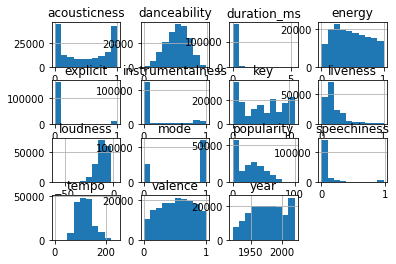

In [18]:
df.hist()

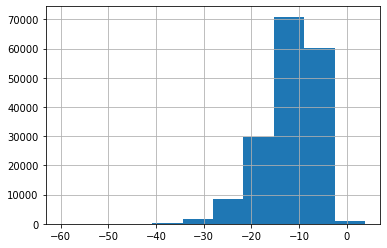

In [12]:
df['loudness'].hist()

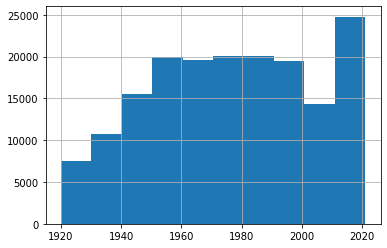

In [13]:
df['year'].hist()

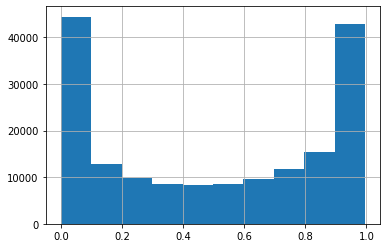

In [14]:
df['acousticness'].hist()

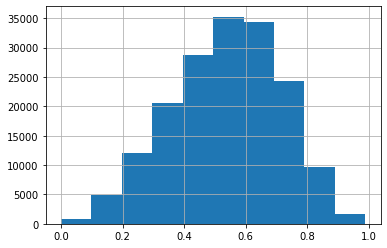

In [15]:
df['danceability'].hist()

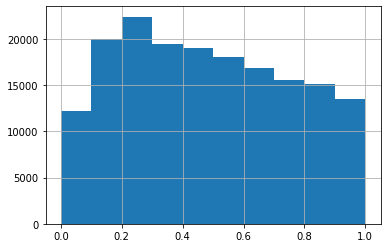

In [16]:
df['energy'].hist()

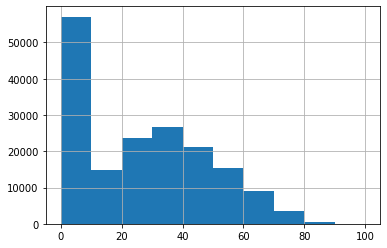

In [17]:
df['popularity'].hist()

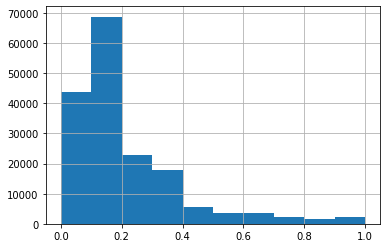

In [19]:
df['liveness'].hist()

 Information about class label distribution through pie chart

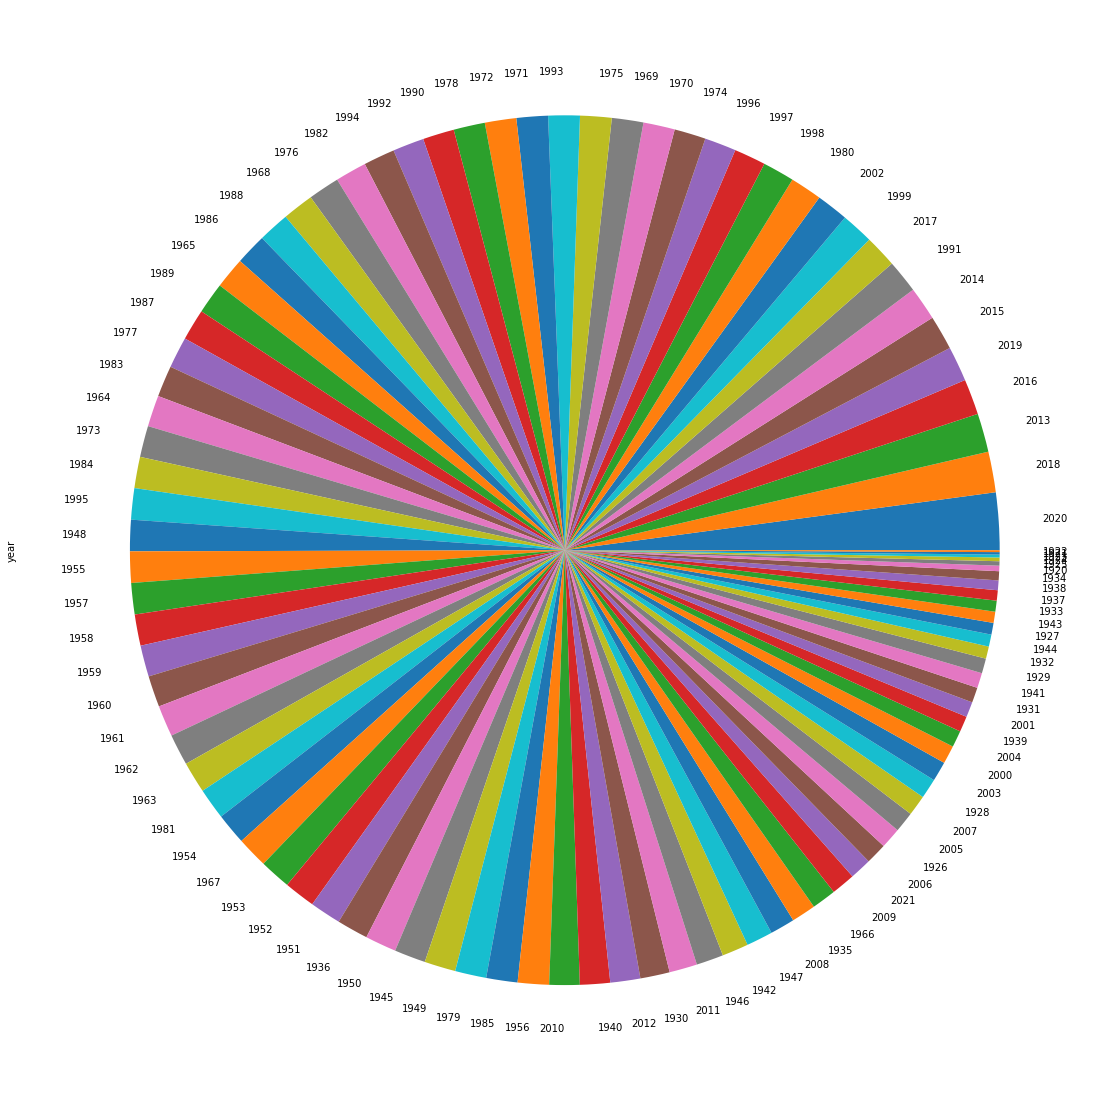

In [27]:
Year = df['year'].value_counts().plot(kind='pie', figsize=(20, 20))

Pre-Processing on the data

In [28]:
new_df=df.drop(['artists','id','name','release_date'],axis = 1)

In [37]:
print('countable attributes')
print(new_df.shape[1])

countable attributes
15


In [36]:
Mean_result=list()
for i in range(0,14):
 column=new_df.columns[i]
 Mean_result.append(new_df[column].mean())
print(Mean_result)
print(len(Mean_result))

[0.5019143813349034, 0.5362459263775124, 232671.82900191605, 0.4809891153498285, 0.06795564071300006, 0.1949675900724568, 5.204395285374209, 0.21139563647448098, -11.777779597050273, 0.7031469546536608, 25.92591302328282, 0.10589632177901731, 116.93776150496343, 0.5252491740933528]
14


In [38]:
SD_result=list()
for i in range(0,14):
 column=new_df.columns[i]
 SD_result.append(new_df[column].std())
print(SD_result)

[0.3793939677541732, 0.1758584973625987, 147176.79102223122, 0.27203231415534146, 0.25167049759757487, 0.3329738098731831, 3.517851265262269, 0.1806613550438609, 5.690104761734201, 0.45687254979444253, 21.866744855991634, 0.18305344504141097, 30.290836327314025, 0.26439159322201305]


In [42]:
sdf=new_df
for i in range(0,14):
 column=new_df.columns[i]
 sdf[column]=preprocessing.scale(new_df[column])
sdf

,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo,valence,year
0,1.289127,0.351159,-0.437155,-0.944703,-0.270019,-0.583968,-0.058102,0.927729,-0.149421,-1.539048,-0.636855,-0.067174,1.090704,0.411326,1920
1,0.371872,1.795506,-0.560361,0.132378,-0.270019,-0.506250,-0.058102,-0.722324,0.793798,-1.539048,-0.865514,-0.286782,-0.992011,1.606526,1920
2,1.294399,0.629793,-0.467771,-1.084393,-0.270019,-0.585483,-1.479429,1.702662,-0.056277,0.649752,-1.002709,0.372044,-0.638405,0.619351,1920
3,-1.322485,1.101764,1.286995,1.165346,-0.270019,1.820066,-0.910898,-0.461614,0.785011,0.649752,-0.408197,-0.346328,0.365103,-1.827027,1920
4,-0.545383,0.953918,-0.458279,0.830826,3.703442,-0.584797,1.363224,1.055040,1.009084,-1.539048,-1.094172,-0.158950,0.169631,-0.855738,1920
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174379,0.772512,-0.609844,-0.597595,-0.992492,-0.270019,-0.585536,-0.342368,-0.085218,0.019820,0.649752,-1.185635,-0.381837,-0.733814,-1.124279,2021
174381,0.772512,-0.609844,-0.597595,-0.992492,-0.270019,-0.585536,-0.342368,-0.085218,0.019820,0.649752,-1.185635,-0.381837,-0.733814,-1.124279,2021
174383,0.772512,-0.609844,-0.597595,-0.992492,-0.270019,-0.585536,-0.342368,-0.085218,0.019820,0.649752,-1.185635,-0.381837,-0.733814,-1.124279,2021
174385,0.772512,-0.609844,-0.597595,-0.992492,-0.270019,-0.585536,-0.342368,-0.085218,0.019820,0.649752,-1.185635,-0.381837,-0.733814,-1.124279,2021


In [43]:
SMean_result=list()
for i in range(0,14):
 column=sdf.columns[i]
 SMean_result.append(round(sdf[column].mean()))
print(SMean_result)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [45]:
SSD_result=list()
for i in range(0,14):
 column=sdf.columns[i]
 SSD_result.append(round(sdf[column].std()))
print(SSD_result)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


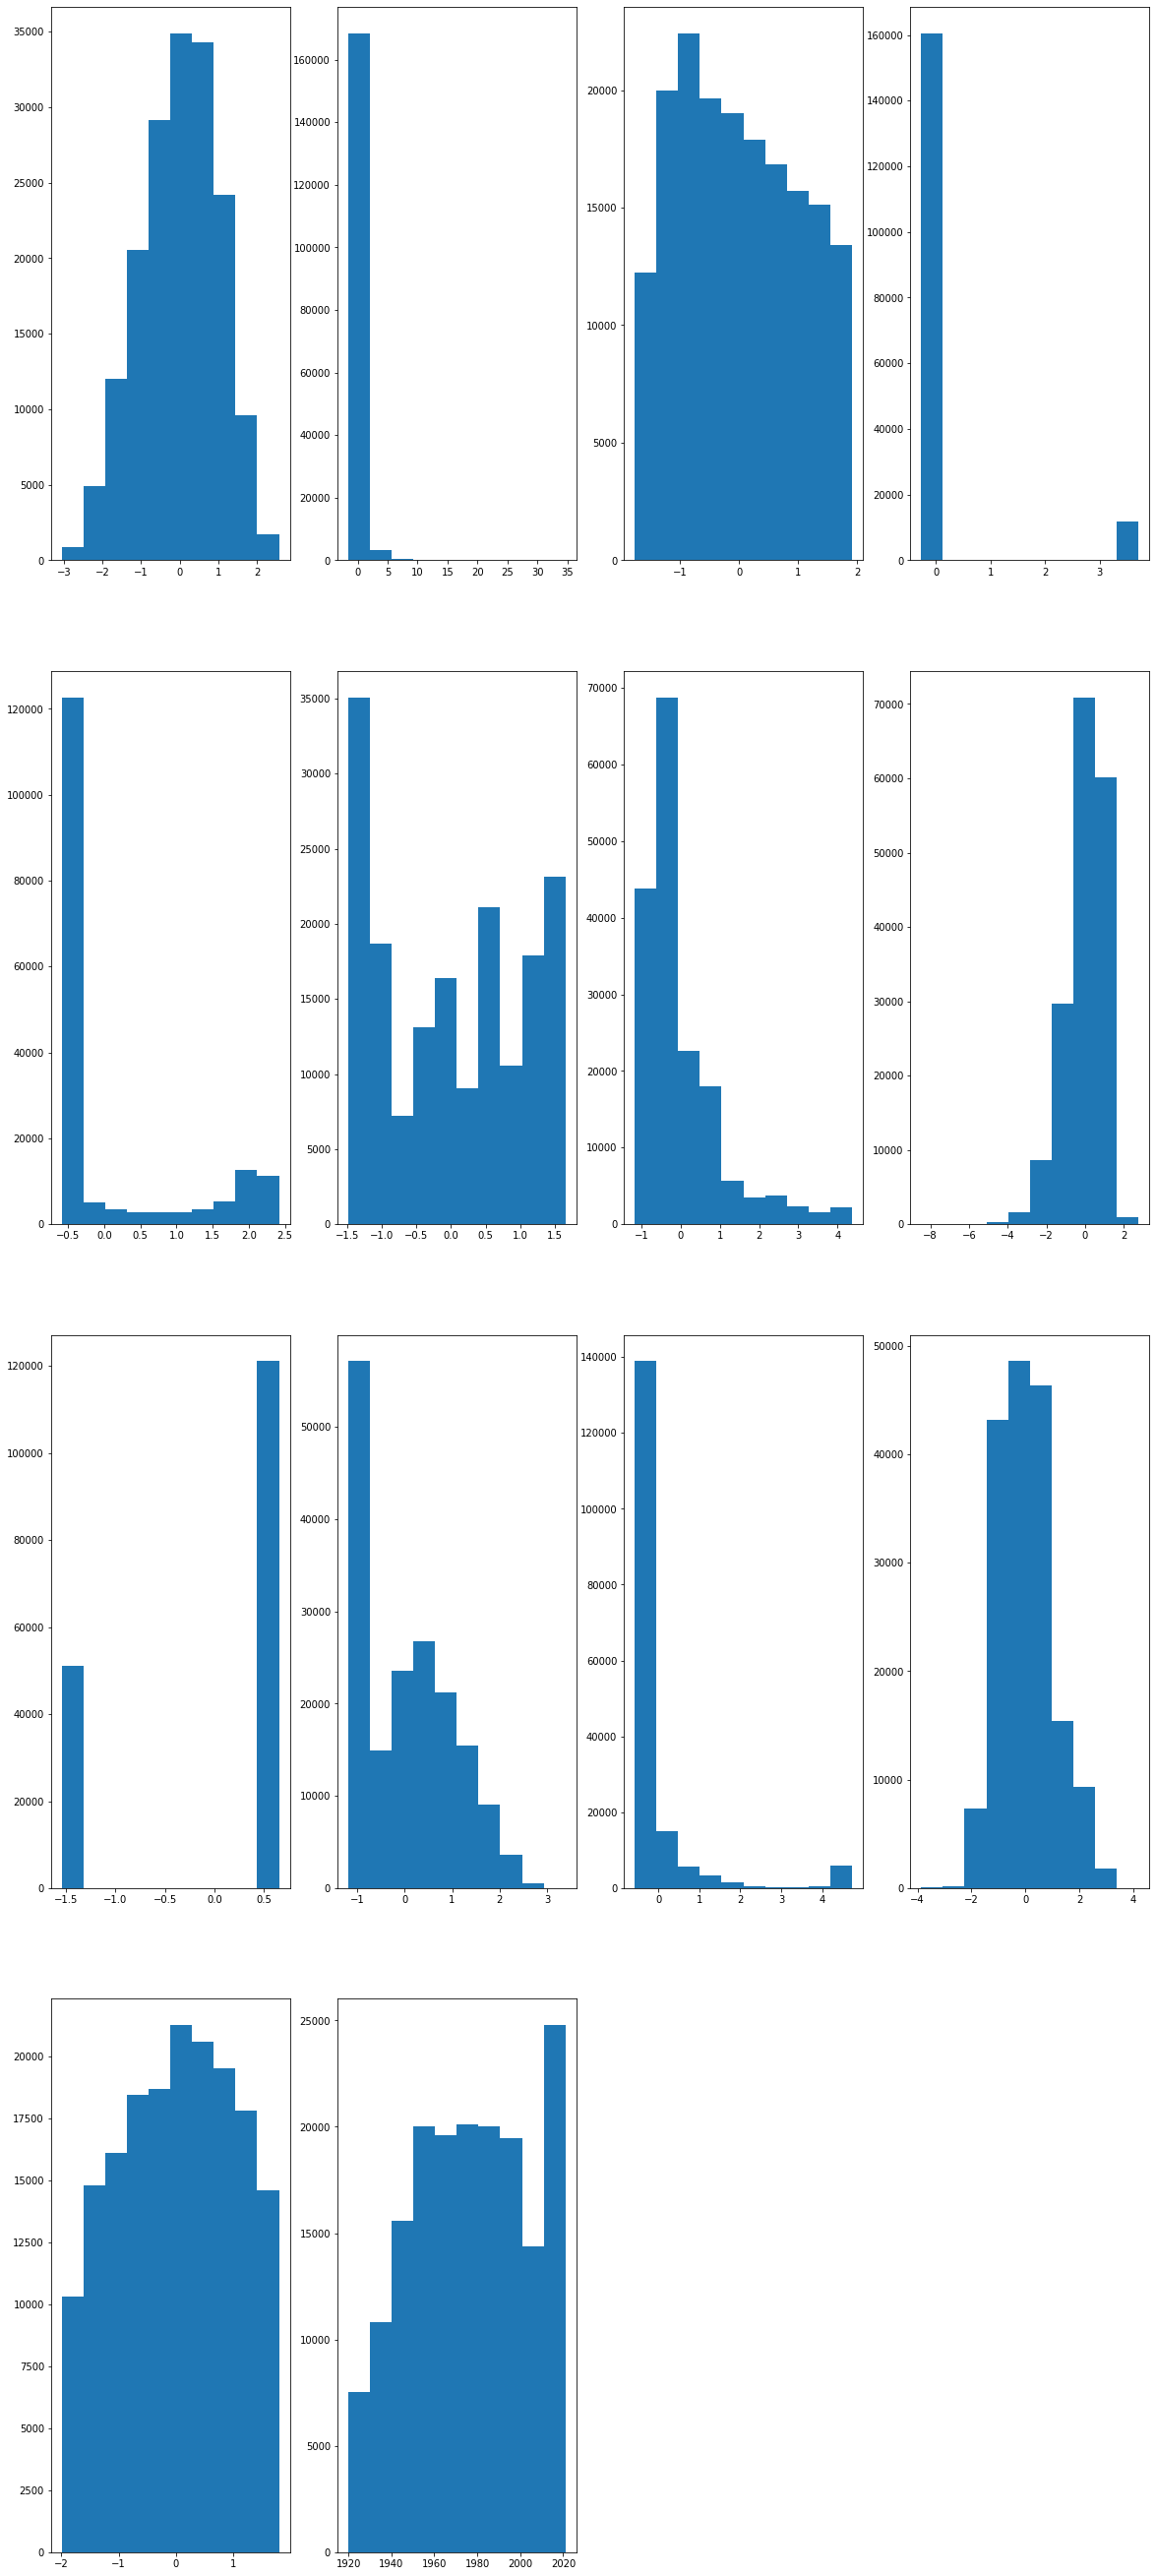

In [48]:
plt.figure(figsize = [20, 60]) 
for i in range(1,sdf.shape[1]):
 column=sdf.columns[i]
 plt.subplot(5,4, i)
 plt.hist(sdf[column])